In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib

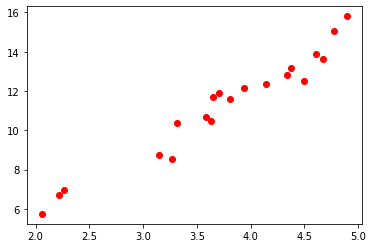

In [2]:
np.random.seed(0)

true_w = 3
true_sigma = 0.5

num_obs = 20
X_obs = np.random.uniform(low=2, high=5, size=num_obs)
noise = np.random.normal(loc=0, scale=true_sigma, size=num_obs)
y_obs = true_w * X_obs + noise

xs = np.linspace(0, 10, 1000)
plt.scatter(X_obs, y_obs, c='r', label='obs')
# plt.xlim(0, 10)
# plt.ylim(0, 5)
plt.show()

In [3]:
w_, res, rank, s = np.linalg.lstsq(X_obs[:, np.newaxis], y_obs[:, np.newaxis], rcond=None)
w_, res, rank, s

(array([[3.00802179]]), array([7.02647959]), 1, array([17.15090371]))

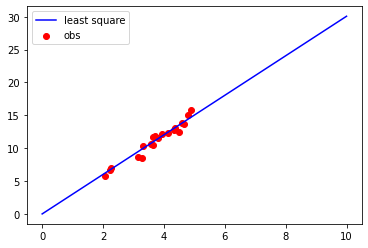

In [4]:
xs = np.linspace(0, 10, 100)

plt.scatter(X_obs, y_obs, c='r', label='obs')

plt.plot(xs, xs * w_[0], c='b', label='least square')

# plt.xlim(0, 10)
# plt.ylim(0, 5)
plt.legend()

plt.show()

In [5]:
import pymc3 as pm
import arviz as az

In [6]:
with pm.Model() as linear_model:
    w = pm.Normal('w', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    epsilon = pm.Normal('epsilon', mu=0, sigma=sigma)
    
    obs = pm.Normal('obs', mu=X_obs * w, sigma=sigma, observed=y_obs)
    
    trace = pm.sample(1000, random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, sigma, w]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


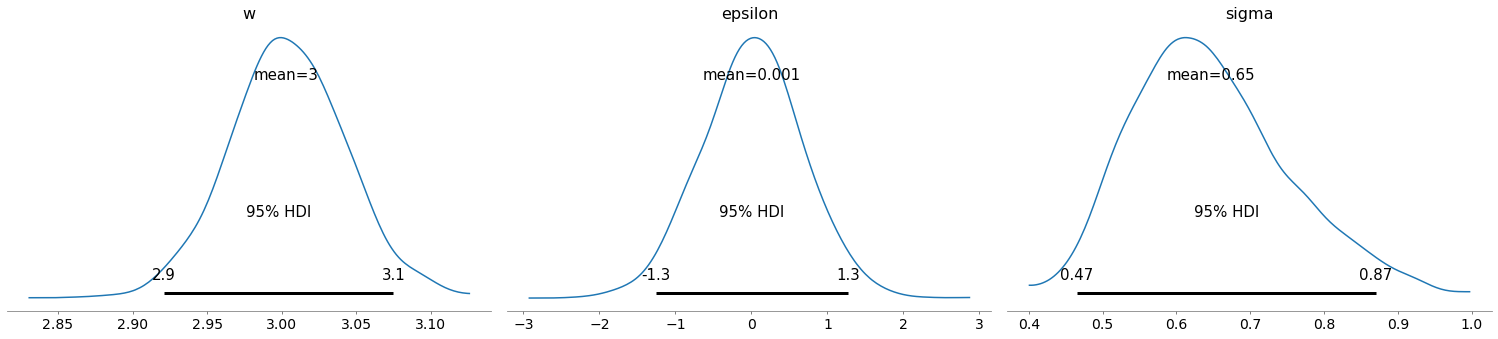

In [7]:
with linear_model:
    az.plot_posterior(trace, hdi_prob=.95)
    
plt.show()

In [8]:
pp_samples = np.array([
    x * trace['w'] + trace['epsilon']
    for x in xs
]).T
pp_samples.shape

(4000, 100)

In [9]:
pp_mean = pp_samples.mean(axis=0)
pp_hdi = az.hdi(pp_samples)
pp_low = pp_hdi[:, 0]
pp_high = pp_hdi[:, 1]

/Users/quannguyen/anaconda3/envs/pymcon-talk/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


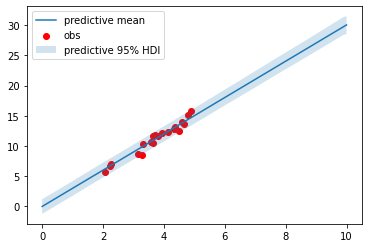

In [11]:
plt.scatter(X_obs, y_obs, c='r', label='obs')

plt.plot(xs, pp_mean, label='predictive mean')
plt.fill_between(xs, pp_high, pp_low, alpha=.2, label='predictive 95% HDI')
plt.legend()
plt.show()